# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [25]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#created url
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="

city_url = url + weather_api_key
city_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=10ec987d8bf48c39b90321d19129d601'

In [ ]:
# Create list to hold info 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

print (f'Beginning Data Retrieval')
print (f'-----------------------------')

# Loop through the list of cities 
for city in cities:
    response = requests.get (city_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    
    try:
        # adds items to the lists that were created above 
        city_name.append (weather_json ['city']['name'])      
        cloudiness.append (weather_json ['list'][0]['clouds']['all'])       
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat']) 
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed']) 
        count = count + 1 
        print(f'Processing record {count} | {city}')  
        
    except:
        print ('City not found. Skipping...')
        pass

print('end of loop')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Assign value to column 
weather_data = {
    'City' : city_name,
    'Cloudiness' : cloudiness,
    'Country' : country,
    'Date' : date,
    'Humidity' : humidity,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Wind Speed' : wind_speed,}


# Create data frame to hold the values 
weather_count = pd.DataFrame(weather_data)
weather_count.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Lng           0
Max Temp      0
Wind Speed    0
dtype: int64

In [28]:
# Print data frame 
weather_count.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

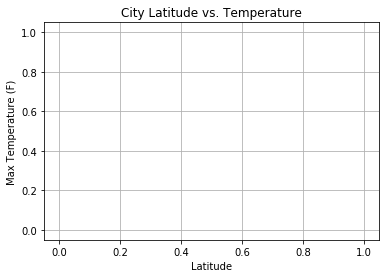

In [29]:
# Create sctter plot comparing the Latitude Vs. Max Temp
plt.scatter (weather_count ['Lat'], weather_count ['Max Temp'], facecolors = 'blue', marker = 'o', edgecolor = 'black')
plt.title ('City Latitude vs. Temperature')
plt.xlabel ('Latitude')
plt.ylabel ('Max Temperature (F)')
plt.grid (True)

plt.savefig('scatplot_lat_maxtemp')

#### Latitude vs. Humidity Plot

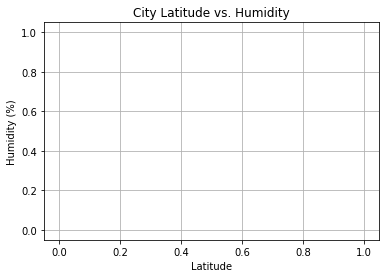

In [10]:
# Create sctter plot comparing the Latitude vs. Humidity 
plt.scatter (weather_count ['Lat'], weather_count ['Humidity'], facecolors = 'green', marker = 'o', edgecolor = 'black')
plt.title ('City Latitude vs. Humidity')
plt.xlabel ('Latitude')
plt.ylabel ('Humidity (%)')
plt.grid (True)

plt.savefig('scatplot_lat_humidity')

#### Latitude vs. Cloudiness Plot

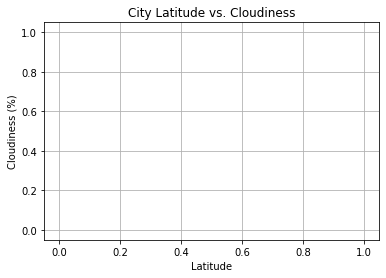

In [11]:
# Create sctter plot comparing the Latitude vs. Cloudiness 
plt.scatter (weather_count ['Lat'], weather_count ['Cloudiness'], facecolors = 'Red', marker = 'o', edgecolor = 'black')
plt.title ('City Latitude vs. Cloudiness')
plt.xlabel ('Latitude')
plt.ylabel ('Cloudiness (%)')
plt.grid (True)

plt.savefig('scatplot_lat_cloudiness')

#### Latitude vs. Wind Speed Plot

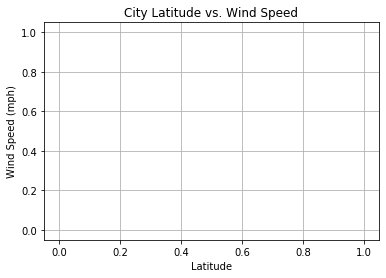

In [12]:
# Create sctter plot comparing the Latitude vs. Wind Speed 
plt.scatter (weather_count ['Lat'], weather_count ['Wind Speed'], facecolors = 'orange', marker = 'o', edgecolor = 'black')
plt.title ('City Latitude vs. Wind Speed')
plt.xlabel ('Latitude')
plt.ylabel ('Wind Speed (mph)')
plt.grid (True)

plt.savefig('scatplot_lat_windspeed')

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_count.loc[weather_count["Lat"] >= 0]
south_df = weather_count.loc[weather_count["Lat"] < 0]

south_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression (x_value, y_value, x_label, y_label, label_position, fig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_value, y_value)
    print (f'The r-squared is: {rvalue}')
    regress_value = x_value * slope + intercept
    line_eq = 'y =' + str (round (slope, 2)) + 'x +' + str(round(intercept, 2))
    
    plt.scatter (x_value, y_value)
    plt.plot (x_value, regress_value, 'r-')
    plt.annotate (line_eq, label_position, fontsize = 14, color = 'red')
    plt.xlabel (x_label)
    plt.ylabel (y_label)
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
x_label = 'Lat'
y_label = 'Max Temp'
label_position = (0,25)
plot_linear_regression (north_df[x_label], north_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_north_lat_temp')

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
x_label = 'Lat'
y_label = 'Max Temp'
label_position = (0,25)
plot_linear_regression (south_df[x_label], south_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_south_lat_temp')

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [17]:
x_label = 'Lat'
y_label = 'Humidity'
label_position = (50,18)
plot_linear_regression (north_df[x_label], north_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_north_lat_humidity')


ValueError: Inputs must not be empty.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [18]:
x_label = 'Lat'
y_label = 'Humidity'
label_position = (-55,20)
plot_linear_regression (south_df[x_label], south_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_south_lat_humidity')

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [19]:

x_label = 'Lat'
y_label = 'Cloudiness'
label_position = (53,40)
plot_linear_regression (north_df[x_label], north_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_north_lat_cloudiness')

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [20]:
x_label = 'Lat'
y_label = 'Cloudiness'
label_position = (-55,20)
plot_linear_regression (south_df[x_label], south_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_south_lat_cloudiness')

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [21]:
x_label = 'Lat'
y_label = 'Wind Speed'
label_position = (0,27)
plot_linear_regression (north_df[x_label], north_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_north_lat_wind')

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [22]:
x_label = 'Lat'
y_label = 'Wind Speed'
label_position = (-20,26)
plot_linear_regression (south_df[x_label], south_df[y_label], x_label, y_label, label_position, 5)

plt.savefig('scatplot_corr_south_lat_wind')

ValueError: Inputs must not be empty.